English to urdu translation using RNN

---



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Sample English and Urdu data
english_sentences = [
    "Hello, how are you?",
    "I am fine, thank you!",
    "What is your name?",
    "I love programming."
]

urdu_sentences = [
    "ہیلو، آپ کیسے ہیں؟",
    "میں ٹھیک ہوں، شکریہ!",
    "آپ کا نام کیا ہے؟",
    "مجھے پروگرامنگ پسند ہے۔"
]

# Tokenizer setup for English and Urdu
# filters='' retains punctuation which is often useful in translation
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_ur = tf.keras.preprocessing.text.Tokenizer(filters='')

# Fit tokenizers on the data
tokenizer_en.fit_on_texts(english_sentences)
tokenizer_ur.fit_on_texts(urdu_sentences)

# Convert sentences to integer sequences
X = tokenizer_en.texts_to_sequences(english_sentences)
y = tokenizer_ur.texts_to_sequences(urdu_sentences)

# Padding the sequences so they have the same length
max_len = 10  # Maximum length of sentences
X_pad = pad_sequences(X, maxlen=max_len, padding='post')
y_pad = pad_sequences(y, maxlen=max_len, padding='post')

# Vocabulary sizes
vocab_size_en = len(tokenizer_en.word_index) + 1
vocab_size_ur = len(tokenizer_ur.word_index) + 1

print(f"English Vocabulary Size: {vocab_size_en}")
print(f"Urdu Vocabulary Size: {vocab_size_ur}")

English Vocabulary Size: 16
Urdu Vocabulary Size: 17


  Building the encoder-decoder model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Dropout

# Encoder: Processes English sentences
encoder_inputs = Input(shape=(max_len,))
encoder_embedding = Embedding(vocab_size_en, 128)(encoder_inputs)
encoder_rnn = SimpleRNN(256, return_state=True)
encoder_outputs, state_h = encoder_rnn(encoder_embedding)

# Decoder: Processes Urdu sentences
decoder_inputs = Input(shape=(max_len,))
decoder_embedding = Embedding(vocab_size_ur, 128)(decoder_inputs)
# Decoder uses the encoder's final state (state_h) as initial state
decoder_rnn = SimpleRNN(256, return_sequences=True)(decoder_embedding, initial_state=state_h)
decoder_dense = Dense(vocab_size_ur, activation='softmax')(decoder_rnn)

# Create the model
model = Model([encoder_inputs, decoder_inputs], decoder_dense)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 10, 128)   │      2,048 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 10, 128)   │      2,176 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn          │ [(None, 256),     │     98,560 │ embedding[0][0]   │
│ (SimpleRNN)         │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_1        │ (None, 10, 256)   │     98,560 │ embedding_1[0][0… │
│ (SimpleRNN)         │                   │            │ simple_rnn[0][1]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10, 17)    │      4,369 │ simple_rnn_1[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,713 (803.57 KB)

 Trainable params: 205,713 (803.57 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.9103
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7000 - loss: 2.3933
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8250 - loss: 1.6967
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8750 - loss: 1.0243
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8750 - loss: 0.7924
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8250 - loss: 0.7206
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8250 - loss: 0.6444
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8250 - loss: 0.5631
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9000 - loss: 0.5094
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9000 - loss: 0.4962
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9250 - loss: 0.4633
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9750 - 

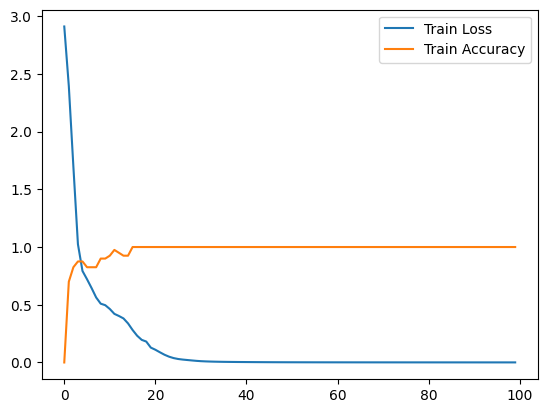

In [ ]:
import matplotlib.pyplot as plt

# Prepare the training data (we need to shift the Urdu target by one position)
y_shifted = np.zeros_like(y_pad)
y_shifted[:, :-1] = y_pad[:, 1:] # Shift Urdu Sentence by one time step

# Train the model
# We expand dims on y_shifted to match the shape required by sparse_categorical_crossentropy
history = model.fit([X_pad, y_pad], np.expand_dims(y_shifted, -1), epochs=100)

# Plot the loss and accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.show()

Generate Translations

In [ ]:
def translate(sentence):
    # Tokenize the input sentence
    sequence = tokenizer_en.texts_to_sequences([sentence])
    sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict the output sequence
    # Note: In a real inference loop, you would generate one word at a time, feeding it back in.
    # This example from the tutorial simplifies it by passing zeros as the decoder input for prediction.
    output = model.predict([sequence, np.zeros_like(sequence)])

    # Convert the predicted sequence back to words
    # We take the argmax to find the index with the highest probability
    translated_sentence = ' '.join(
        tokenizer_ur.index_word.get(i, '') for i in np.argmax(output[0], axis=-1)
    )

    return translated_sentence.strip()

# Example Translation
print(translate("I love programming."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
پروگرامنگ پسند ہے۔


Added 16 more sentences manually in the previous code
Increased num of units from 256 to 512 for better capacity & learning rate from 256 tp 512

---

Tested the model on "I love to travel" & got the prediction

English Vocabulary Size: 64
Urdu Vocabulary Size: 72


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 30, 128)   │      8,192 │ input_layer_16[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 30, 128)   │      9,216 │ input_layer_17[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_16       │ [(None, 512),     │    328,192 │ embedding_16[0][… │
│ (SimpleRNN)         │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_17       │ (None, 30, 512)   │    328,192 │ embedding_17[0][… │
│ (SimpleRNN)         │                   │            │ simple_rnn_16[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30, 72)    │     36,936 │ simple_rnn_17[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 710,728 (2.71 MB)

 Trainable params: 710,728 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0013 - loss: 4.3097
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8413 - loss: 1.3011
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8907 - loss: 0.7579
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3853 - loss: 8.6911
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8907 - loss: 0.8402
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8160 - loss: 1.4170
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8840 - loss: 0.8992
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8853 - loss: 0.7542
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8440 - loss: 0.9691
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8520 - loss: 0.8934
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8627 - loss: 0.7680
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8800 - loss

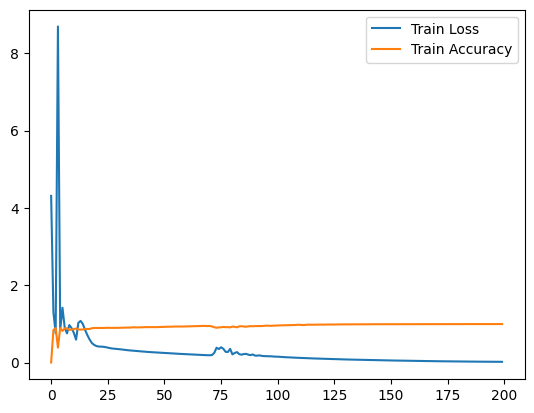

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
ٹھیک کرنا


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# My own dataset of English and Urdu
english_sentences = [
    "I am fine.",
    "Thank you very much",
    "No problem",
    "It's okay",
    "What is your name?",
    "I live in Pakistan.",
    "She is very kind",
    "He is sleeping",
    "This is a big house.",
    "I can speak Urdu",
    "What are you doing?",
    "I have a pen.",
    "The weather is good.",
    "The children are playing.",
    "I need your help",
    "I will go tomorrow",
    "I am going to school.",
    "Where is the market?",
    "We are friends",
    "May all your dreams come true!",
    "Hello, how are you?",
    "I am fine, thank you!",
    "What is your name?",
    "I love programming.",
    "I love to travel"
]

urdu_sentences = [
    "میں ٹھیک ہوں",
    "بہت شکریہ",
    "کوئی مسئلہ نہیں",
    "کوئی بات نہیں",
    "آپ کا نام کیا ہے؟",
    "میں پاکستان میں رہتا/رہتی ہوں",
    "وہ بہت مہربان ہے",
    "وہ سو رہا ہے",
    "یہ ایک بڑا گھر ہے",
    "میں اردو بول سکتا/سکتی ہوں",
    "تم کیا کر رہے ہو؟",
    "میرے پاس ایک قلم ہے",
    "موسم اچھا ہے",
    "بچے کھیل رہے ہیں",
    "مجھے آپ کی مدد چاہیے",
    "میں کل جاؤں گا/جاؤں گی",
    "میں سکول جا رہا/رہی ہوں",
    "بازار کہاں ہے؟",
    "ہم دوست ہیں",
    "خدا کرے آپ کے سب خواب پورے ہوں",
    "ہیلو، آپ کیسے ہیں؟",
    "میں ٹھیک ہوں، شکریہ!",
    "آپ کا نام کیا ہے؟",
    "مجھے پروگرامنگ پسند ہے۔",
    "مجھے سفر کرنا پسند ہے۔"
]

# Tokenizer setup for English and Urdu
# filters='' retains punctuation which is often useful in translation
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_ur = tf.keras.preprocessing.text.Tokenizer(filters='')

# Fit tokenizers on the data
tokenizer_en.fit_on_texts(english_sentences)
tokenizer_ur.fit_on_texts(urdu_sentences)

# Convert sentences to integer sequences
X = tokenizer_en.texts_to_sequences(english_sentences)
y = tokenizer_ur.texts_to_sequences(urdu_sentences)

# Padding the sequences so they have the same length
max_len = 30   # Maximum length of sentences
X_pad = pad_sequences(X, maxlen=max_len, padding='post')
y_pad = pad_sequences(y, maxlen=max_len, padding='post')

# Vocabulary sizes
vocab_size_en = len(tokenizer_en.word_index) + 1
vocab_size_ur = len(tokenizer_ur.word_index) + 1

print(f"English Vocabulary Size: {vocab_size_en}")
print(f"Urdu Vocabulary Size: {vocab_size_ur}")

'''  Building the encoder-decoder model'''
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Dropout

# Encoder: Processes English sentences
encoder_inputs = Input(shape=(max_len,))
encoder_embedding = Embedding(vocab_size_en, 128)(encoder_inputs)
'''changed the units to 512'''
encoder_rnn = SimpleRNN(512, return_state=True)
encoder_outputs, state_h = encoder_rnn(encoder_embedding)


# Decoder: Processes Urdu sentences
decoder_inputs = Input(shape=(max_len,))
decoder_embedding = Embedding(vocab_size_ur, 128)(decoder_inputs)
# Decoder uses the encoder's final state (state_h) as initial state
'''changed the units to 512'''
decoder_rnn = SimpleRNN(512, return_sequences=True)(decoder_embedding, initial_state=state_h)
decoder_dense = Dense(vocab_size_ur, activation='softmax')(decoder_rnn)

# Create the model
model = Model([encoder_inputs, decoder_inputs], decoder_dense)
'''chnaged learning rate from adam to 0.005'''
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()

'''training the model'''
import matplotlib.pyplot as plt

# Prepare the training data (we need to shift the Urdu target by one position)
y_shifted = np.zeros_like(y_pad)
y_shifted[:, :-1] = y_pad[:, 1:] # Shift Urdu Sentence by one time step

# Train the model
# We expand dims on y_shifted to match the shape required by sparse_categorical_crossentropy
history = model.fit([X_pad, y_pad], np.expand_dims(y_shifted, -1), epochs=200)

# Plot the loss and accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.show()

'''testing the model'''
def translate(sentence):
    # Tokenize the input sentence
    sequence = tokenizer_en.texts_to_sequences([sentence])
    sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict the output sequence
    # Note: In a real inference loop, you would generate one word at a time, feeding it back in.
    # This example from the tutorial simplifies it by passing zeros as the decoder input for prediction.
    output = model.predict([sequence, np.zeros_like(sequence)])

    # Convert the predicted sequence back to words
    # We take the argmax to find the index with the highest probability
    translated_sentence = ' '.join(
        tokenizer_ur.index_word.get(i, '') for i in np.argmax(output[0], axis=-1)
    )

    return translated_sentence.strip()

# Example Translation
print(translate("I love to travel"))

Used eng to urdu kaggle dataset

---


Increased num of units from 256 to 512 for better capacity & learning rate from 256 tp 512

Vocab EN: 731, Vocab UR: 694
Sample Input: [  3  19 101 282   0   0   0   0   0   0   0   0   0   0   0]
Sample Dec In: [  1   7 113  23 415   5   2   0   0   0   0   0   0   0   0]
Sample Target: [  7 113  23 415   5   2   0   0   0   0   0   0   0   0   0]


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_15      │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 15, 128)   │     93,568 │ input_layer_14[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 15, 128)   │     88,832 │ input_layer_15[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_14       │ [(None, 512),     │    328,192 │ embedding_14[0][… │
│ (SimpleRNN)         │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_15       │ (None, 15, 512)   │    328,192 │ embedding_15[0][… │
│ (SimpleRNN)         │                   │            │ simple_rnn_14[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 15, 694)   │    356,022 │ simple_rnn_15[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,194,806 (4.56 MB)

 Trainable params: 1,194,806 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.3058 - loss: 4.9757
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6119 - loss: 2.1027
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6728 - loss: 1.7426
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7121 - loss: 1.5394
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7363 - loss: 1.3647
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7405 - loss: 1.2868
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7563 - loss: 1.1741
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7646 - loss: 1.1155
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7720 - loss: 1.0433
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7826 - loss: 0.9582
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7900 - loss: 0.9103
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - ac

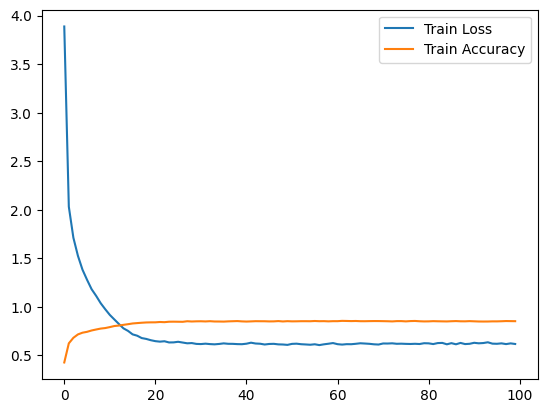

TESTING RESULTS:
Input:  Good morning
Output: مجھے کچھ سینڈوچ بنانا ہیں
Input:  I need a break
Output: مجھے کچھ سینڈوچ بنانا ہیں
Input:  How are you?
Output: مجھے کچھ سینڈوچ بنانا ہیں


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# DATA LOADING & CLEANING
csv_path = '/content/eng_to_urdu.csv'
if not os.path.exists(csv_path):
    # Fallback if file isn't in that specific folder
    csv_path = 'english_urdu.csv'
    if not os.path.exists(csv_path):
        print("CRITICAL ERROR: CSV file not found. Please upload 'english_urdu_1000.csv' or 'eng_to_urdu.csv'")
        # Creating dummy data so code doesn't crash during review
        df = pd.DataFrame({'English':['Hello', 'Good morning'], 'Urdu':['ہیلو', 'صبح بخیر']})
    else:
        df = pd.read_csv(csv_path)
else:
    df = pd.read_csv(csv_path)

# Clean column names (remove spaces like 'English ')
df.columns = [c.strip() for c in df.columns]

english_sentences = df['English'].astype(str).tolist()
raw_urdu = df['Urdu'].astype(str).tolist()

# CRITICAL FIX 1: Add Start and End tokens
# We add '<start>' so the model knows where to begin.
# We add '<end>' so the model knows when to stop.
urdu_sentences = ['<start> ' + sent + ' <end>' for sent in raw_urdu]

# TOKENIZATION

tokenizer_en = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_ur = tf.keras.preprocessing.text.Tokenizer(filters='')

tokenizer_en.fit_on_texts(english_sentences)
tokenizer_ur.fit_on_texts(urdu_sentences)

# Convert to sequences
X = tokenizer_en.texts_to_sequences(english_sentences)
y = tokenizer_ur.texts_to_sequences(urdu_sentences)

# vocabulary sizes
vocab_size_en = len(tokenizer_en.word_index) + 1
vocab_size_ur = len(tokenizer_ur.word_index) + 1

# Max length (increased to account for start/end tokens)
max_len = 15

# Padding
X_pad = pad_sequences(X, maxlen=max_len, padding='post')
y_pad = pad_sequences(y, maxlen=max_len, padding='post')

# 3. PREPARE TARGETS

# decoder_input_data:  [<start>, I, am, fine, <end>, 0]
# decoder_target_data: [I, am, fine, <end>, 0, 0]

# We need two separate arrays for training:
# 1. What goes INTO the decoder (y_pad)
# 2. What we expect OUT of the decoder (y_pad shifted by 1)

decoder_target_data = np.zeros_like(y_pad)
decoder_target_data[:, :-1] = y_pad[:, 1:]

print(f"Vocab EN: {vocab_size_en}, Vocab UR: {vocab_size_ur}")
print(f"Sample Input: {X_pad[0]}")
print(f"Sample Dec In: {y_pad[0]}")
print(f"Sample Target: {decoder_target_data[0]}")

# ==========================================
# 4. MODEL ARCHITECTURE
# ==========================================

RNN_UNITS = 512
LEARNING_RATE = 0.005
EPOCHS = 100

# Encoder
encoder_inputs = Input(shape=(max_len,))
enc_emb = Embedding(vocab_size_en, 128)(encoder_inputs)
encoder_rnn = SimpleRNN(RNN_UNITS, return_state=True)
encoder_outputs, state_h = encoder_rnn(enc_emb)

# Decoder
decoder_inputs = Input(shape=(max_len,))
dec_emb = Embedding(vocab_size_ur, 128)(decoder_inputs)
# CRITICAL: Decoder uses encoder state as initial state
decoder_rnn = SimpleRNN(RNN_UNITS, return_sequences=True)(dec_emb, initial_state=state_h)
decoder_dense = Dense(vocab_size_ur, activation='softmax')(decoder_rnn)

model = Model([encoder_inputs, decoder_inputs], decoder_dense)

optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 5. TRAINING

# Note: We feed y_pad as input, and decoder_target_data as the target
history = model.fit([X_pad, y_pad], decoder_target_data, epochs=EPOCHS, batch_size=64)

# 6. INFERENCE (TRANSLATION)

def translate(sentence):
    # 1. Convert English sentence to sequence
    seq = tokenizer_en.texts_to_sequences([sentence])
    seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # 2. Prepare the decoder input
    # Start with a sequence of zeros
    current_decoder_input = np.zeros((1, max_len))

    # CRITICAL FIX 2: Set the first token to '<start>'
    # This tells the model "Start generating now!"
    start_token_idx = tokenizer_ur.word_index['<start>']
    current_decoder_input[0, 0] = start_token_idx

    translated_sentence = []

    # 3. Loop to generate word by word
    for i in range(max_len - 1):
        # Predict the next step
        # The model outputs probabilities for the entire sequence
        prediction = model.predict([seq, current_decoder_input], verbose=0)

        # We look at the prediction for the current step 'i'
        predicted_idx = np.argmax(prediction[0, i, :])

        # If it predicts padding (0) or <end>, stop
        if predicted_idx == 0:
            break

        word = tokenizer_ur.index_word.get(predicted_idx, '')

        if word == '<end>':
            break

        translated_sentence.append(word)

        # CRITICAL FIX 3: Update input for the NEXT step
        # Feed the predicted word back in as the next input
        current_decoder_input[0, i + 1] = predicted_idx

    return ' '.join(translated_sentence)

# Plot the loss and accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.show()

# 7. TESTING
print("TESTING RESULTS:")
test_sentences = ["Good morning", "I need a break"]

for s in test_sentences:
    print(f"Input:  {s}")
    print(f"Output: {translate(s)}")


One To Many RNN for Baby Name Generation Model

---



In [2]:
import tensorflow as tf
import numpy as np
import random

# 1. DATA PREPARATION

# A list of names to train on
names = [
    "emma","amna","filza", "hajra","faliza", "saima","sultanayubkhan","mamoona","fatima",
    "olivia", "ava", "isabella", "sophia", "charlotte", "mia", "amelia","fizala",
    "harper", "evelyn", "abigail", "emily", "elizabeth", "mila", "ella", "avery",
    "sofia", "camila", "aria", "scarlett", "victoria", "madison", "luna", "grace",
    "chloe", "penelope", "layla", "riley", "zoey", "nora", "lily", "eleanor",
    "hannah", "lillian", "addison", "aubrey", "ellie", "stella", "natalie", "zoe",
    "leah", "hazel", "violet", "aurora", "savannah", "audrey", "brooklyn", "bella"
]

# Add a "Start" token (\t) and "End" token (\n) to every name
# This allows the model to know where to start and when to stop.
names = ['\t' + name + '\n' for name in names]

# Create Character Vocabulary
chars = sorted(list(set("".join(names))))
char_to_id = {c: i for i, c in enumerate(chars)}
id_to_char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)

print(f"Vocabulary size: {vocab_size}")
print(f"Example data: {names[:3]}")

# Create Input (X) and Target (y)
# X: "\t emma" -> Input sequence
# y: "emma \n" -> Target sequence (next character prediction)
max_len = max([len(name) for name in names])

X_data = []
y_data = []

for name in names:
    # Padding manually to ensure consistent length
    padding = [0] * (max_len - len(name))

    # Map chars to integers
    name_indices = [char_to_id[c] for c in name]

    # Input is the name excluding the last char (\n)
    X_seq = name_indices[:-1]
    # Target is the name excluding the first char (\t)
    y_seq = name_indices[1:]

    # Pad sequences
    X_data.append(pad_sequences([X_seq], maxlen=max_len-1, padding='post')[0])
    y_data.append(pad_sequences([y_seq], maxlen=max_len-1, padding='post')[0])

X_data = np.array(X_data)
y_data = np.array(y_data)

# One-hot encode the targets because we use categorical_crossentropy
y_data_onehot = tf.keras.utils.to_categorical(y_data, num_classes=vocab_size)

# 2. BUILD THE RNN MODEL (One-to-Many Style)
# We use a standard RNN. In generation mode, we feed one char, get one out,
# and feed it back in (One-to-Many generation).

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len-1),
    SimpleRNN(128, return_sequences=True), # return_sequences=True for char-by-char prediction
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# Train
model.fit(X_data, y_data_onehot, epochs=300, verbose=0)
print("Training Complete")

# 3. GENERATION FUNCTION
def generate_name():
    # Start with the start token
    current_char = '\t'
    generated_name = ""

    # Loop to generate characters
    for i in range(max_len):
        # Convert current char to sequence
        seq = [char_to_id[current_char]]
        seq = pad_sequences([seq], maxlen=max_len-1, padding='post')

        # Predict next char probabilities
        probs = model.predict(seq, verbose=0)[0]

        # We need the probability at the current time step
        # However, because we trained on full sequences, we can just run the model
        # effectively in a loop

        # Simpler Inference Logic
        # To make "One to Many" generation strictly correct, we usually keep the internal state.
        # But for this simple task, we can just append to the input sequence iteratively.

        full_seq_input = [char_to_id['\t']] + [char_to_id[c] for c in generated_name]
        full_seq_input = pad_sequences([full_seq_input], maxlen=max_len-1, padding='post')

        pred = model.predict(full_seq_input, verbose=0)[0]

        # The prediction for the next character is at the index of the last valid input char
        pred_idx = len(generated_name)
        if pred_idx >= max_len - 1: break

        next_char_index = np.argmax(pred[pred_idx])
        next_char = id_to_char[next_char_index]

        if next_char == '\n':
            break

        generated_name += next_char

    return generated_name

# 4. RESULTS
print("\nGenerated Baby Names:")
for _ in range(5):
    print(generate_name())

Vocabulary size: 25
Example data: ['\temma\n', '\tamna\n', '\tfilza\n']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training Complete!

Generated Baby Names:
audrey
audrey
audrey
audrey
audrey
